In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Chioma proper/Trial/CONSUMPTION DATA.csv")
data.head()

,Date,Business Unit,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting
0,1/1/2019,ABULE EGBA,29005.64,313.78,117.24,582.731775,150.737272,66.99
1,1/1/2019,AKOWONJO,42967.86,334.70,635.17,621.583662,816.646951,362.95
2,1/1/2019,IKEJA,32039.02,1918.92,6533.44,3563.704638,8400.132287,3733.39
3,1/1/2019,IKORODU,47547.38,4462.64,511.07,8287.769101,657.091238,292.04
4,1/1/2019,OSHODI,46534.40,5705.02,1512.07,10595.032060,1944.092169,864.04


In [ ]:
business_unit_mapping = {
    'ABULE EGBA': 'Egba',
    'AKOWONJO': 'Wonjo',
    'IKEJA': 'Eja',
    'IKORODU': 'Orodu',
    'OSHODI': 'Hodi',
    'SHOMOLU': 'Shomo'
}

# Replace the values in the "Business Unit" column
data['Business Unit'] = data['Business Unit'].replace(business_unit_mapping)

# Display the modified DataFrame
data.head()

,Date,Business Unit,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting
0,1/1/2019,Egba,29005.64,313.78,117.24,582.731775,150.737272,66.99
1,1/1/2019,Wonjo,42967.86,334.70,635.17,621.583662,816.646951,362.95
2,1/1/2019,Eja,32039.02,1918.92,6533.44,3563.704638,8400.132287,3733.39
3,1/1/2019,Orodu,47547.38,4462.64,511.07,8287.769101,657.091238,292.04
4,1/1/2019,Hodi,46534.40,5705.02,1512.07,10595.032060,1944.092169,864.04


In [ ]:
data.Date=pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)
data.head()

,Business Unit,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting
Date,,,,,,,
2019-01-01,Egba,29005.64,313.78,117.24,582.731775,150.737272,66.99
2019-01-01,Wonjo,42967.86,334.70,635.17,621.583662,816.646951,362.95
2019-01-01,Eja,32039.02,1918.92,6533.44,3563.704638,8400.132287,3733.39
2019-01-01,Orodu,47547.38,4462.64,511.07,8287.769101,657.091238,292.04
2019-01-01,Hodi,46534.40,5705.02,1512.07,10595.032060,1944.092169,864.04


In [ ]:
data.describe()

,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,45072.676111,2339.079653,2030.062951,4344.004915,2582.828157,1210.621493
std,11957.817138,935.948966,1130.428571,1738.190765,1436.249527,762.949687
min,14981.740000,268.430000,108.630000,498.517500,139.668062,62.070000
25%,33403.200000,2165.772917,1398.794583,4022.152560,1798.450245,803.375417
50%,47953.875000,2371.144167,1776.985000,4403.558692,2259.782014,1022.112500
75%,54741.612500,2499.592500,2372.185417,4642.102007,3016.189521,1355.533334
max,68834.930000,5917.370000,6533.440000,10989.394220,8400.132287,4717.480000


In [ ]:
data['Business Unit'].unique()

array(['Egba', 'Wonjo', 'Eja', 'Orodu', 'Hodi', 'Shomo'], dtype=object)

## Abule Egba

In [ ]:
bUnit = "Egba"
dataEGBA = data[data["Business Unit"] == bUnit].drop(["Business Unit"], axis=1)
dataEGBA.head()

,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting
Date,,,,,,
2019-01-01,29005.64,313.78,117.24,582.731775,150.737272,66.99
2019-02-01,26545.31,285.42,134.65,530.063782,173.121421,76.94
2019-03-01,14981.74,302.28,133.52,561.371584,171.666950,76.30
2019-04-01,28014.75,300.41,124.46,557.912725,160.023078,71.12
2019-05-01,26183.91,279.68,108.63,519.412153,139.668062,62.07


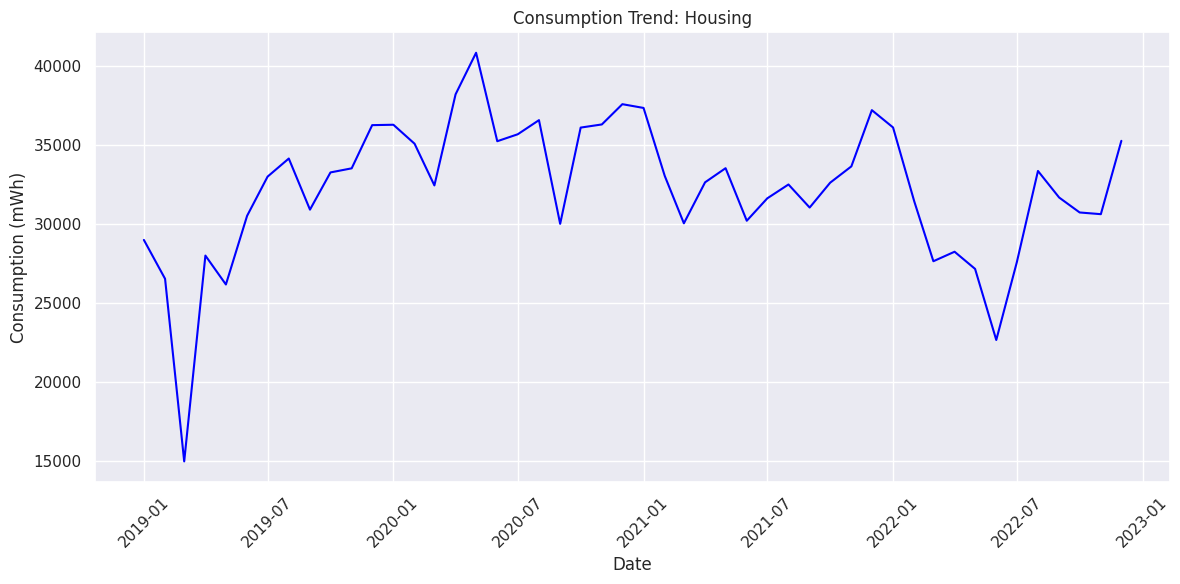

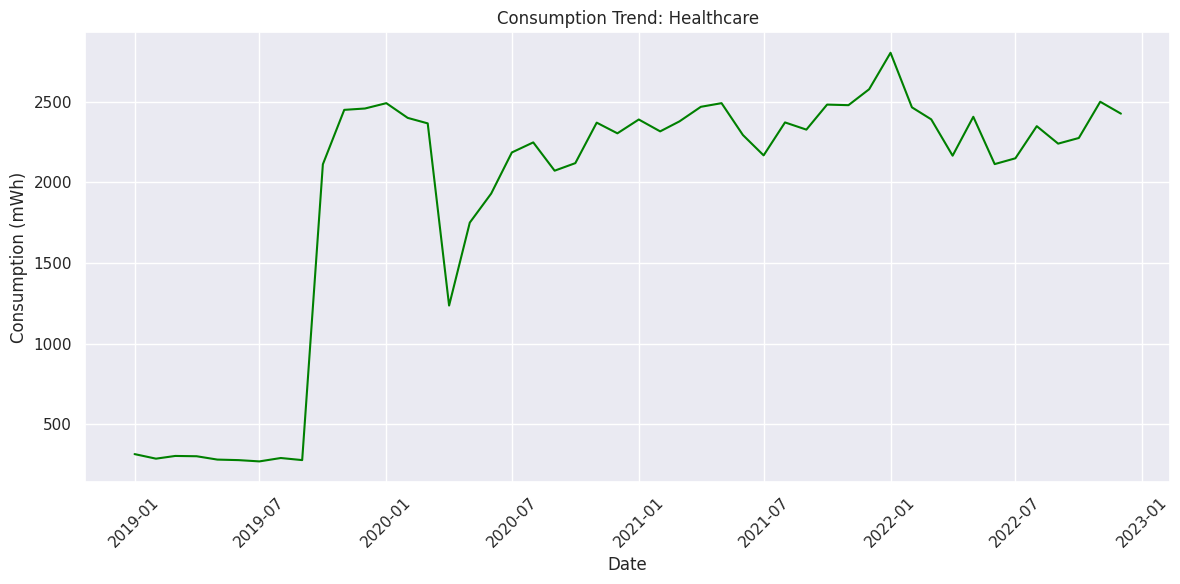

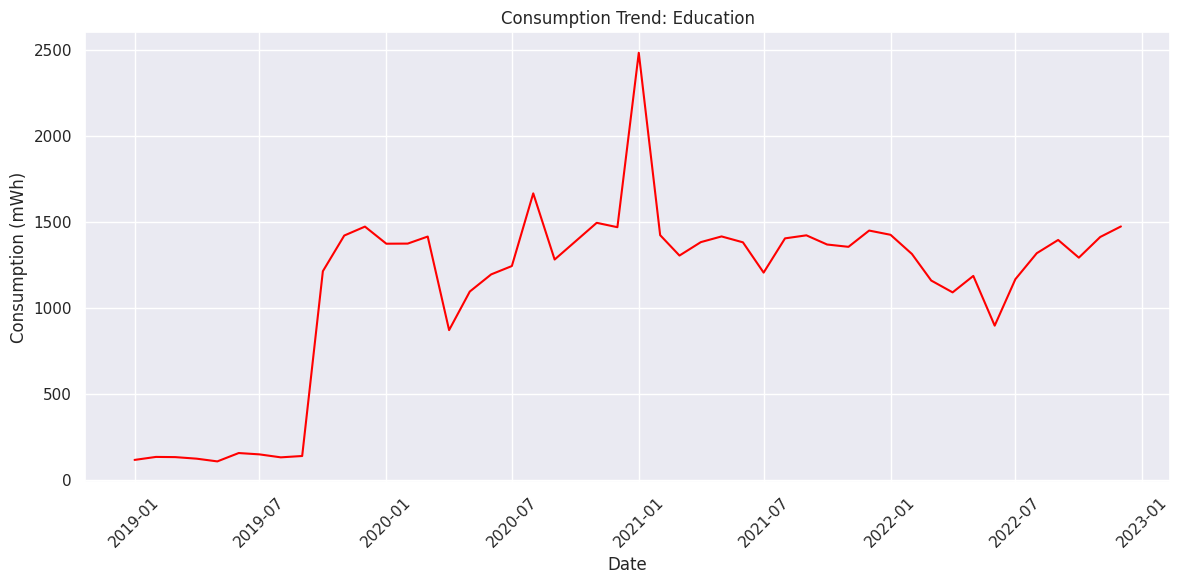

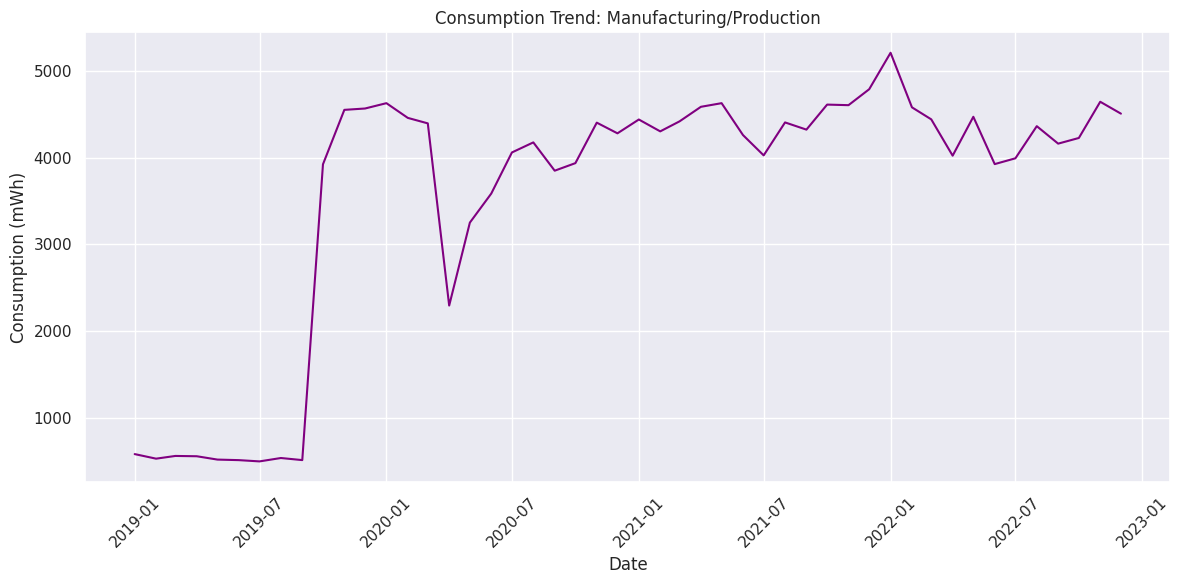

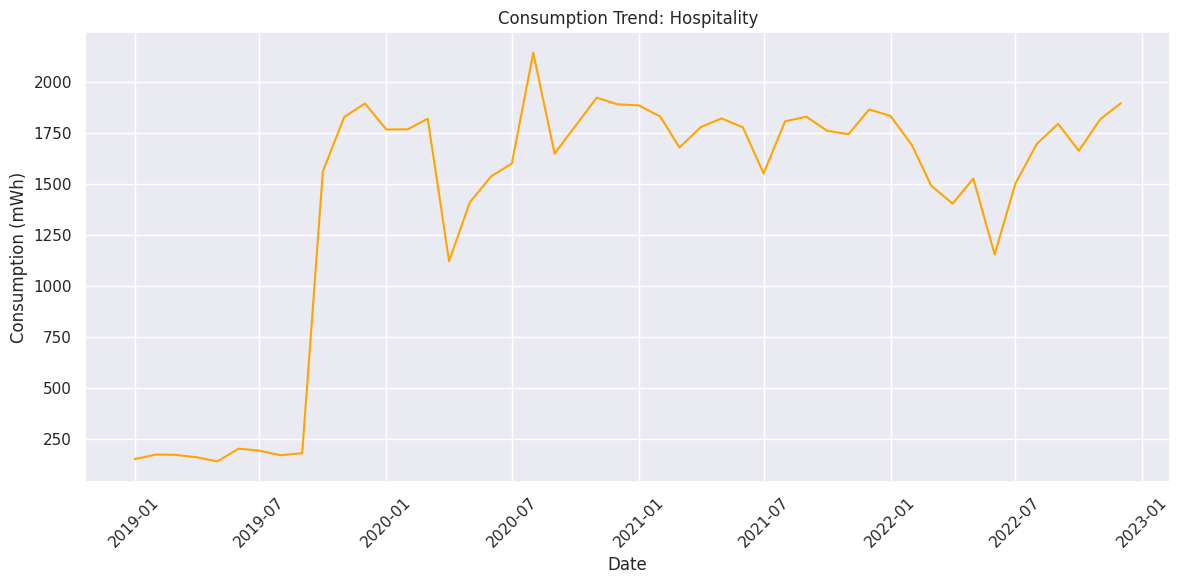

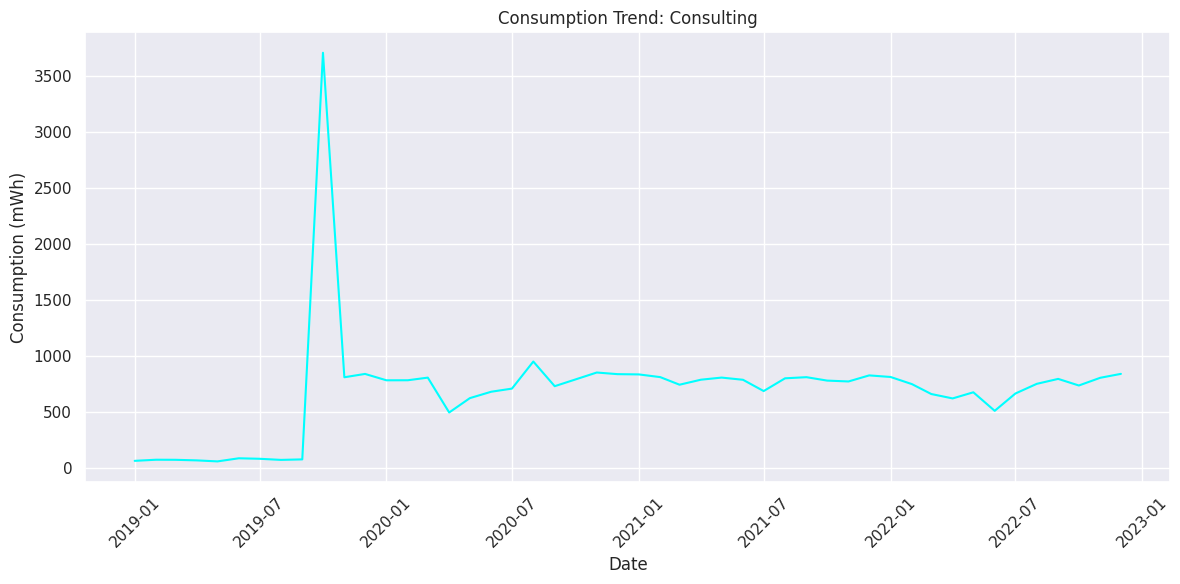

In [ ]:
# Columns to plot (excluding the index column)
columns_to_plot = dataEGBA.columns[0:]

# Set up colors for the lines
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Iterate through each column and create a separate line chart
for idx, col in enumerate(columns_to_plot):
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.plot(dataEGBA.index, dataEGBA[col], color=colors[idx])  # Use the index for x-axis
    plt.xlabel('Date')
    plt.ylabel('Consumption (mWh)')
    plt.title(f'Consumption Trend: {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()

    plt.show()

In [ ]:
dataEGBA["month"] = dataEGBA.index.month
dataEGBA["month_name"] =dataEGBA.index.month_name()
dataEGBA["year"] = dataEGBA.index.year
dataEGBA.head()

,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting,month,month_name,year
Date,,,,,,,,,
2019-01-01,29005.64,313.78,117.24,582.731775,150.737272,66.99,1,January,2019
2019-02-01,26545.31,285.42,134.65,530.063782,173.121421,76.94,2,February,2019
2019-03-01,14981.74,302.28,133.52,561.371584,171.666950,76.30,3,March,2019
2019-04-01,28014.75,300.41,124.46,557.912725,160.023078,71.12,4,April,2019
2019-05-01,26183.91,279.68,108.63,519.412153,139.668062,62.07,5,May,2019


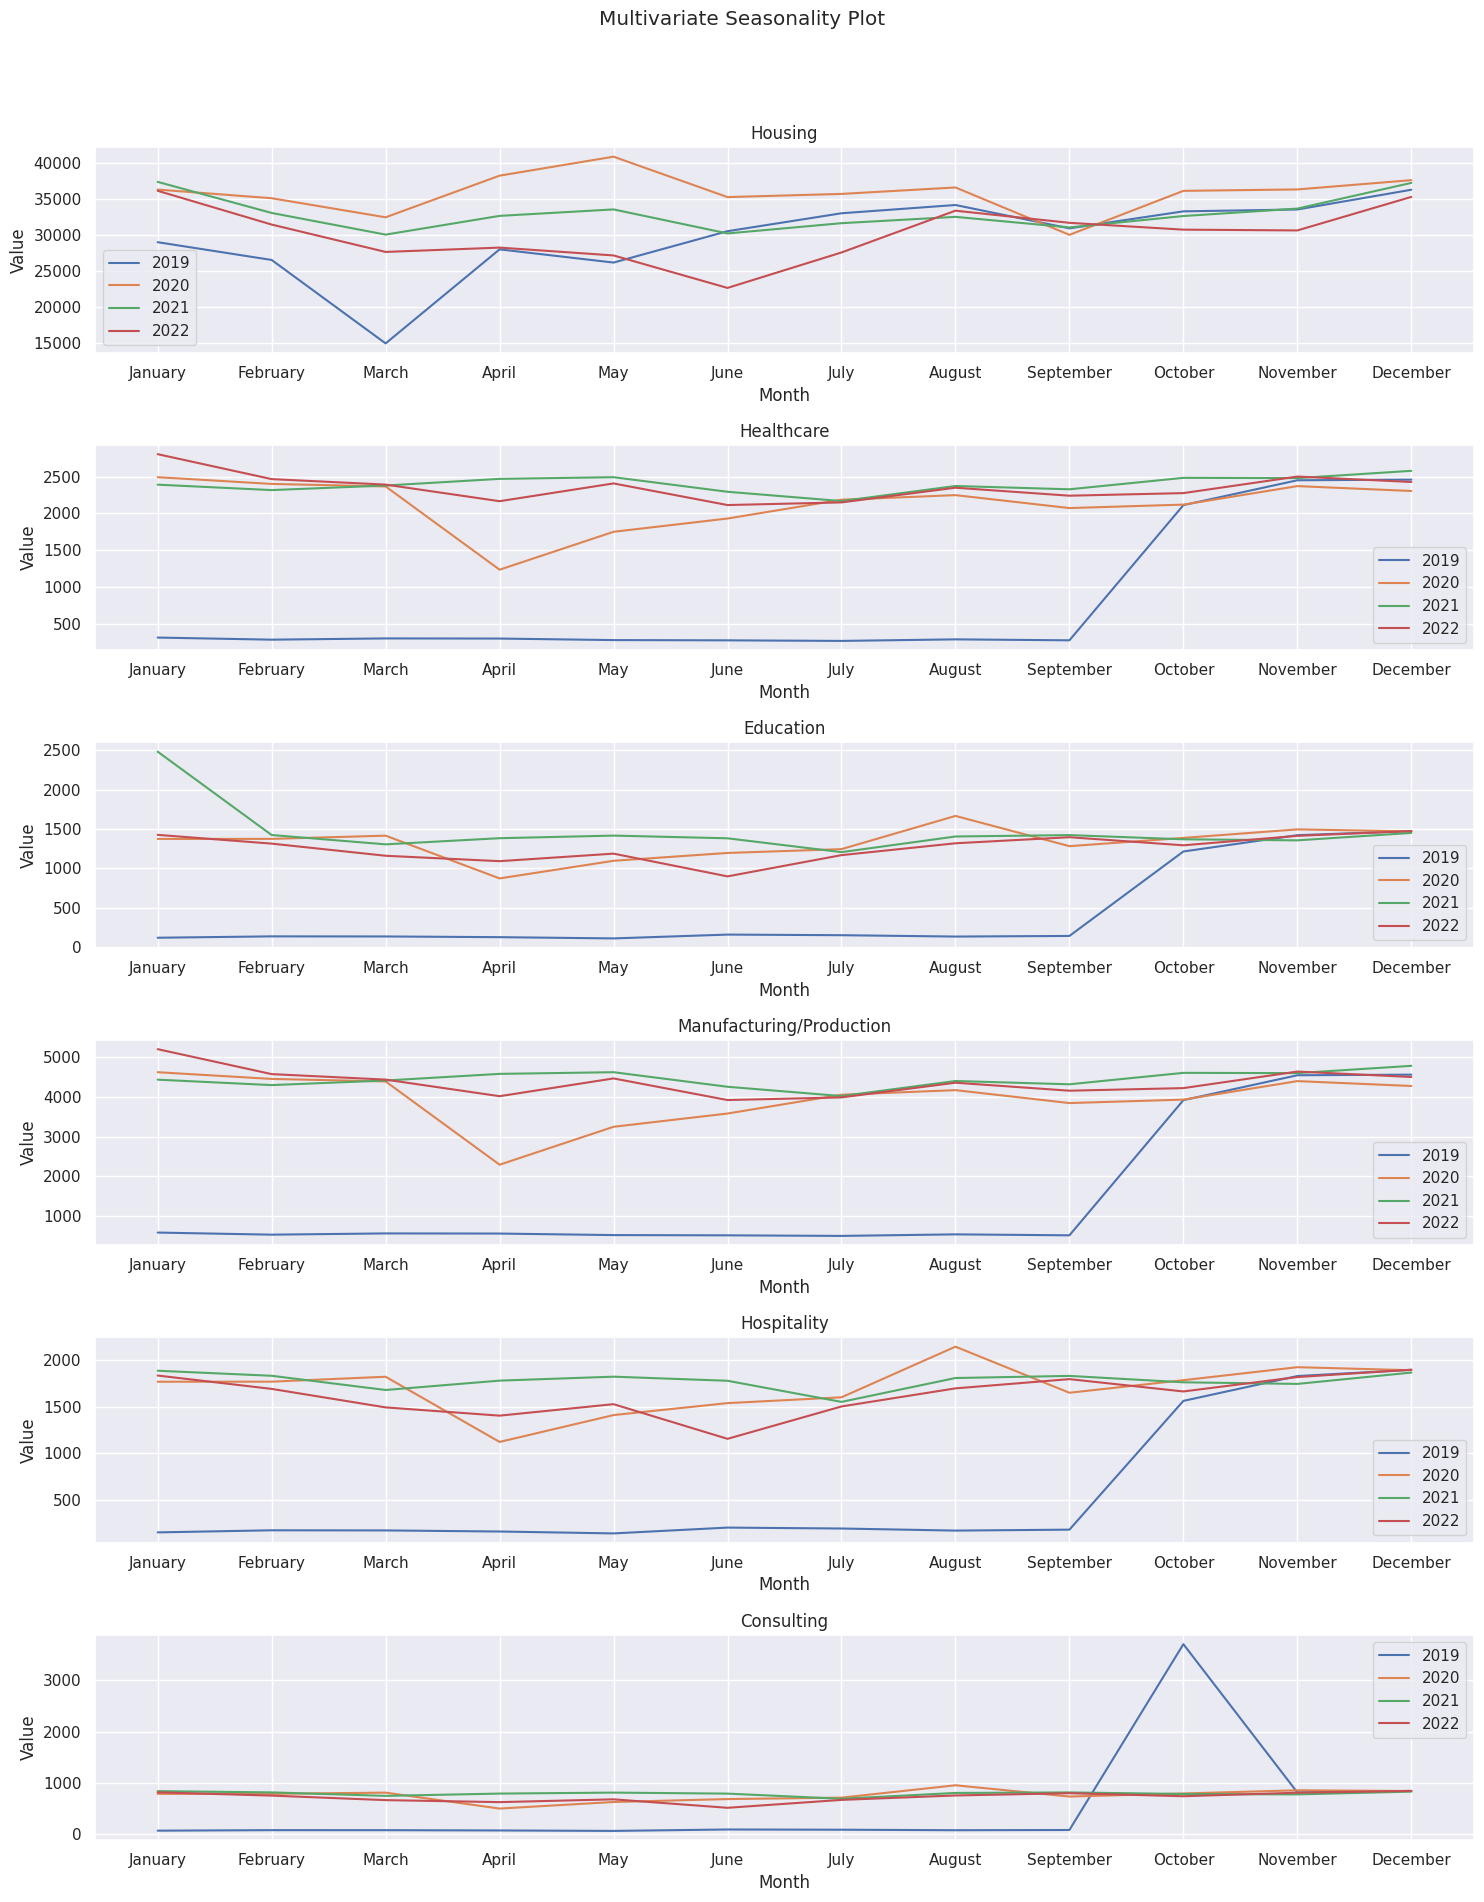

In [ ]:
# Set up subplots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))
fig.suptitle('Multivariate Seasonality Plot')

# Iterate through variables and plot them
variables = ['Housing', 'Healthcare', 'Education', 'Manufacturing/Production', 'Hospitality', 'Consulting']
for i, ax in enumerate(axes.flatten()):
    var = variables[i]
    for year in dataEGBA['year'].unique():
        subset = dataEGBA[dataEGBA['year'] == year]
        ax.plot(subset['month_name'], subset[var], label=str(year))

    ax.set_title(var)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


### Stationarity Test

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Columns in the dataframe
columns_to_check = [0, 1, 2, 3, 4, 5]  # Column indices

# Perform Augmented Dickey-Fuller test for each column
for col_index in columns_to_check:
    column_name = dataEGBA.columns[col_index]
    X = dataEGBA.iloc[:, col_index].values
    result = adfuller(X)
    print(f"Column: {column_name}")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

    if result[0] < result[4]["5%"]:
        print("Reject Ho - Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")

    print("="*50)

Column: Housing
ADF Statistic: -3.337467274382218
p-value: 0.013284529656477435
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Reject Ho - Time Series is Stationary
Column: Healthcare
ADF Statistic: -3.600762307749795
p-value: 0.005746470775813004
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject Ho - Time Series is Stationary
Column: Education
ADF Statistic: -2.515850837179189
p-value: 0.11166512426953107
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Failed to Reject Ho - Time Series is Non-Stationary
Column: Manufacturing/Production
ADF Statistic: -3.6007573785378617
p-value: 0.005746564796403063
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject Ho - Time Series is Stationary
Column: Hospitality
ADF Statistic: -2.175985821240822
p-value: 0.21507636366676747
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Failed to Reject Ho - Time Series is Non-Stationary
Column: Consulting
ADF Statistic: -2.126005698006376
p-value: 0.23418695348620017
Criti

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
columns_to_difference = [2, 4, 5]

# Apply differencing to the specified columns
for col in columns_to_difference:
    dataEGBA.iloc[:, col] = dataEGBA.iloc[:, col].diff()

# Drop missing values in the resulting DataFrame
dataEGBA = dataEGBA.dropna()

# Check for stationarity using the Augmented Dickey-Fuller test
for col in columns_to_difference:
    result = adfuller(dataEGBA.iloc[:, col])
    print(f"ADF Statistic for column {col}: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    print(f"Is Stationary? {'Yes' if result[1] < 0.05 else 'No'}")


ADF Statistic for column 2: -5.725706662083729
P-value: 6.779211083367735e-07
Critical Values: {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}
Is Stationary? Yes
ADF Statistic for column 4: -3.6462129300781867
P-value: 0.0049365729673271274
Critical Values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}
Is Stationary? Yes
ADF Statistic for column 5: -2.8869992999924112
P-value: 0.046880823435294344
Critical Values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
Is Stationary? Yes


In [ ]:
# Columns in the dataframe
columns_to_check = [0, 1, 2, 3, 4, 5]  # Column indices

# Perform Augmented Dickey-Fuller test for each column
for col_index in columns_to_check:
    column_name = dataEGBA.columns[col_index]
    X = dataEGBA.iloc[:, col_index].values
    result = adfuller(X)
    print(f"Column: {column_name}")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

    if result[0] < result[4]["5%"]:
        print("Reject Ho - Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")

    print("="*50)

Column: Housing
ADF Statistic: -3.4372559294166827
p-value: 0.009752517960033399
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Reject Ho - Time Series is Stationary
Column: Healthcare
ADF Statistic: -4.757096344912622
p-value: 6.565166474042821e-05
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607
Reject Ho - Time Series is Stationary
Column: Education
ADF Statistic: -5.725706662083729
p-value: 6.779211083367735e-07
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Reject Ho - Time Series is Stationary
Column: Manufacturing/Production
ADF Statistic: -4.757091258483611
p-value: 6.565312437297938e-05
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607
Reject Ho - Time Series is Stationary
Column: Hospitality
ADF Statistic: -3.6462129300781867
p-value: 0.0049365729673271274
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject Ho - Time Series is Stationary
Column: Consulting
ADF Statistic: -2.8869992999924112
p-value: 0.046880823435294344
Critical Values:
	1%: -3

### ACF and PACF


In [ ]:
# Columns in the dataframe
columns_to_check = dataEGBA.columns[:6] # Column indices

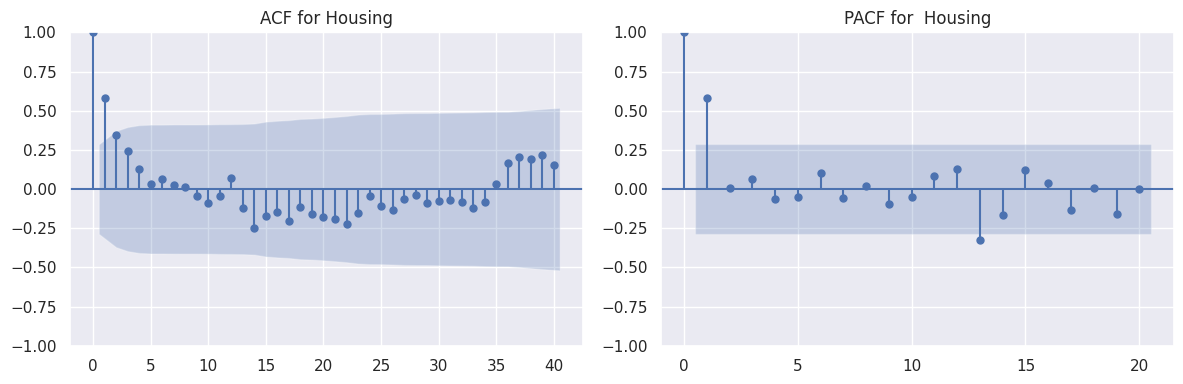

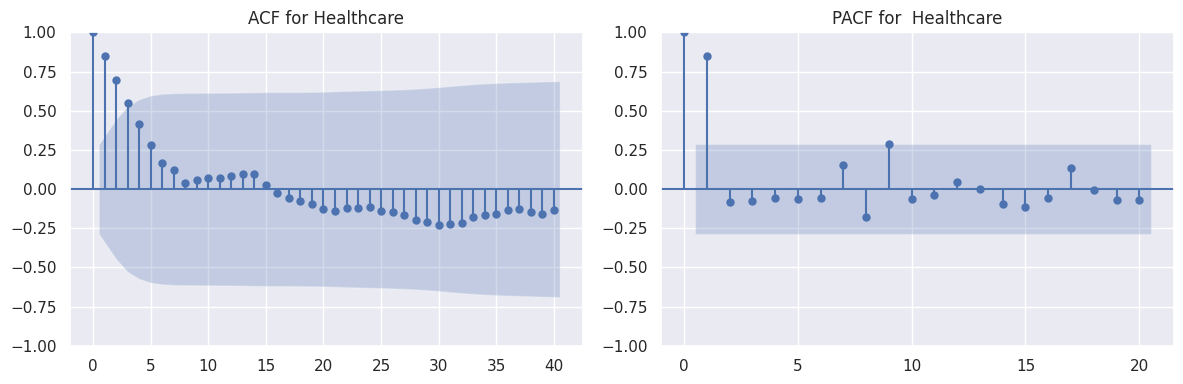

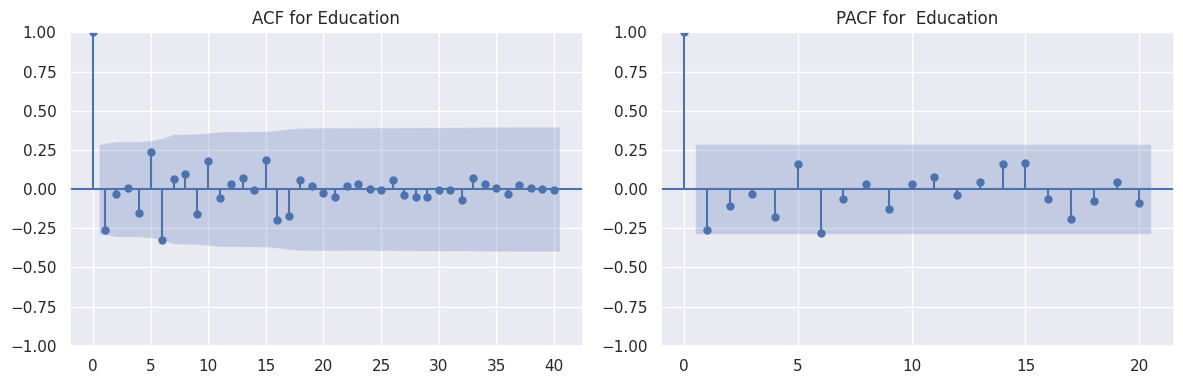

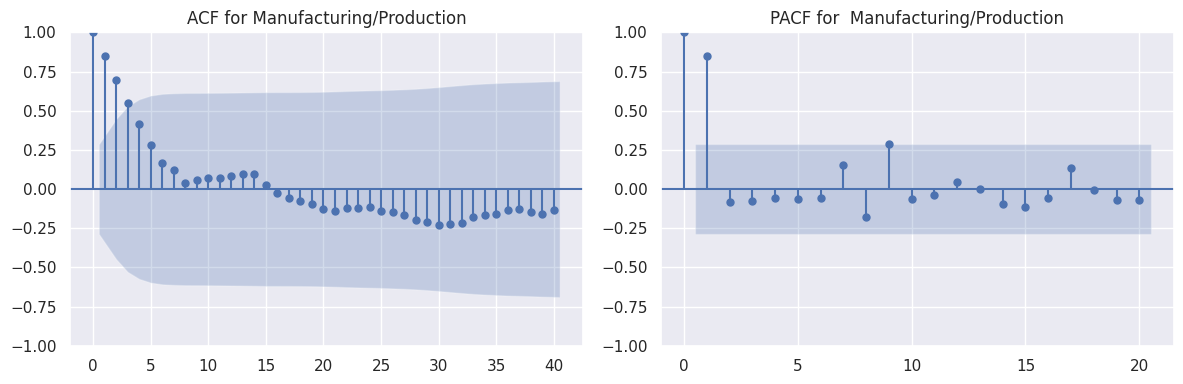

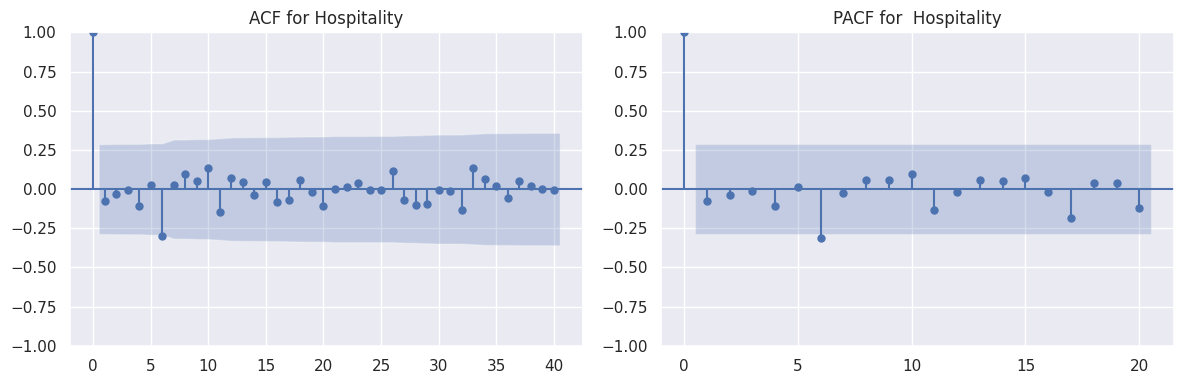

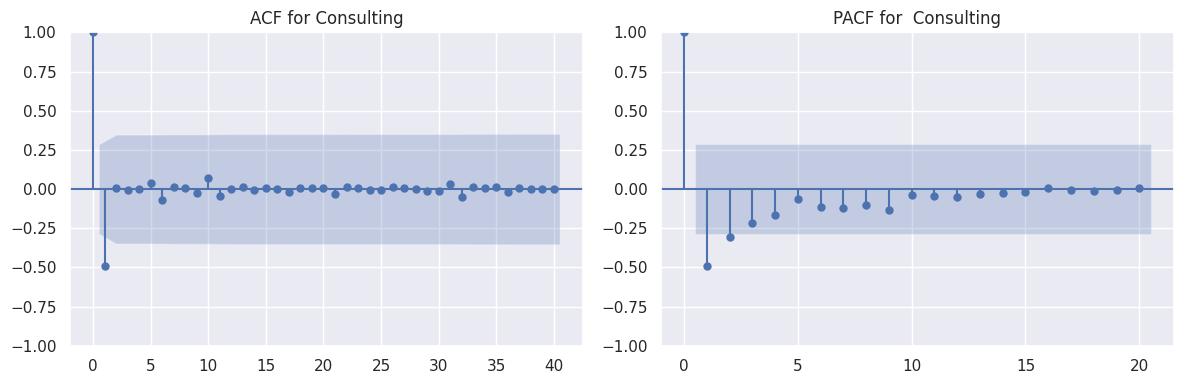

In [ ]:
# Visualize ACF and PACF for each column
for col in columns_to_check:
    plt.figure(figsize=(12, 4))

    # ACF Plot
    ax1 = plt.subplot(121)
    plot_acf(dataEGBA[col], ax=ax1, lags=40)
    ax1.set_title(f'ACF for {col}')

    # PACF Plot
    ax2 = plt.subplot(122)
    plot_pacf(dataEGBA[col], ax=ax2, lags=20)
    ax2.set_title(f'PACF for  {col}')

    plt.tight_layout()
    plt.show()

### Orde of the model



**Forecasting using AR Model**

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#make copy of the data
dfEgba=dataEGBA.copy()
dfEgba.head()


,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting,month,month_name,year
Date,,,,,,,,,
2019-02-01,26545.31,285.42,17.41,530.063782,22.384149,9.95,2,February,2019
2019-03-01,14981.74,302.28,-1.13,561.371584,-1.454471,-0.64,3,March,2019
2019-04-01,28014.75,300.41,-9.06,557.912725,-11.643872,-5.18,4,April,2019
2019-05-01,26183.91,279.68,-15.83,519.412153,-20.355016,-9.05,5,May,2019
2019-06-01,30531.23,276.29,48.57,513.104949,62.439952,27.76,6,June,2019


In [ ]:
dfEgba.drop(['month'	,'month_name'	,'year'], axis=1,inplace=True)
dfEgba.head()

,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting
Date,,,,,,
2019-02-01,26545.31,285.42,17.41,530.063782,22.384149,9.95
2019-03-01,14981.74,302.28,-1.13,561.371584,-1.454471,-0.64
2019-04-01,28014.75,300.41,-9.06,557.912725,-11.643872,-5.18
2019-05-01,26183.91,279.68,-15.83,519.412153,-20.355016,-9.05
2019-06-01,30531.23,276.29,48.57,513.104949,62.439952,27.76


In [ ]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create a dictionary to store model summaries and predictions
results = {}


In [ ]:
size=int(len(dfEgba)*0.8)
df_train=dfEgba.iloc[:size]
df_test=dfEgba.iloc[size:]

In [ ]:
# Specify the lag order for AR model
lags = 2  # AR(2) model

# Define a list of columns to model
columns_to_model = df_train.columns

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


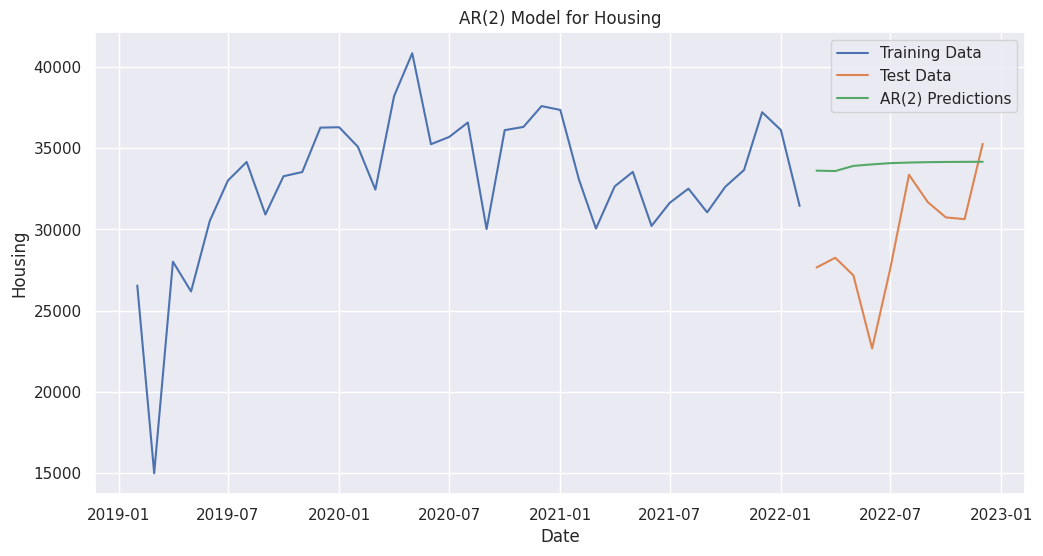

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


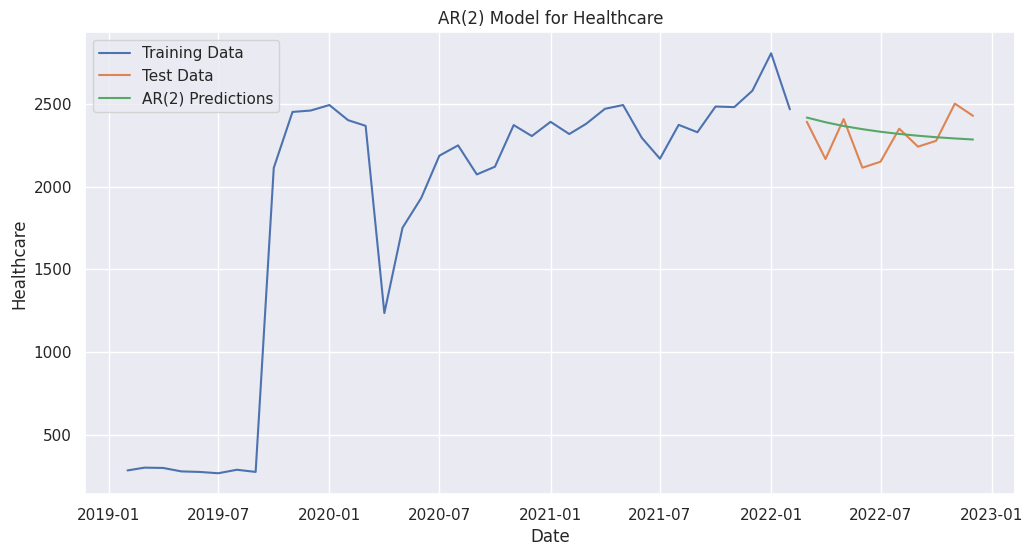

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


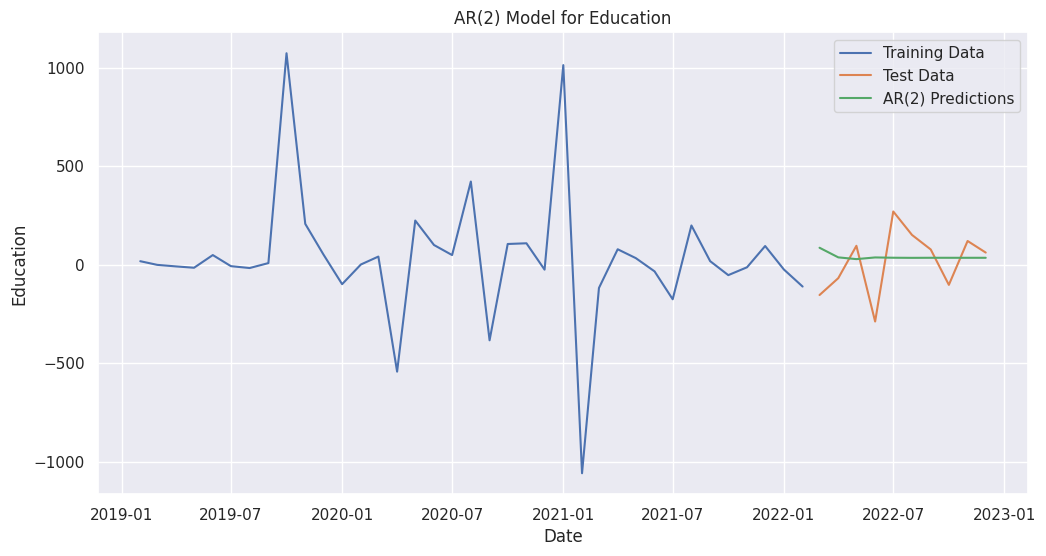

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


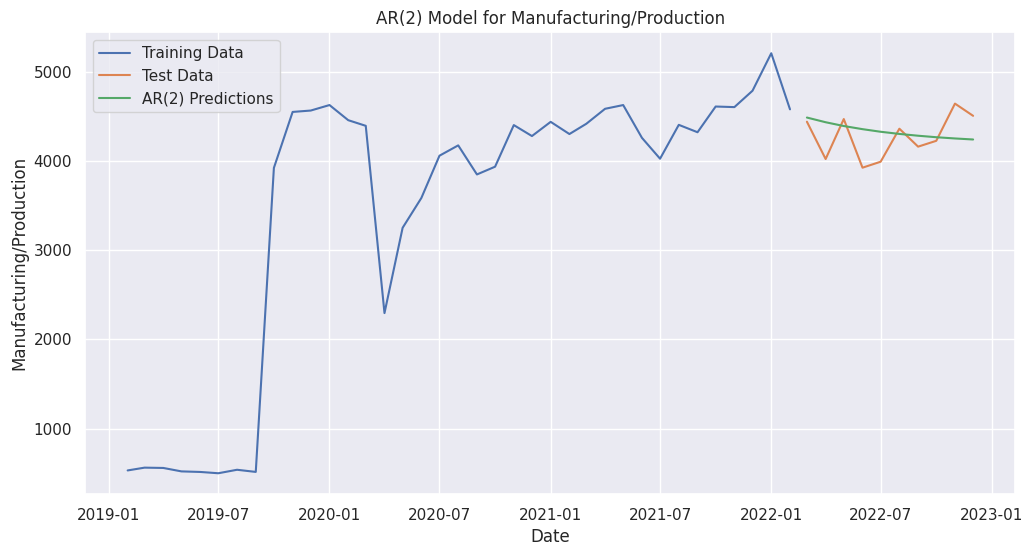

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


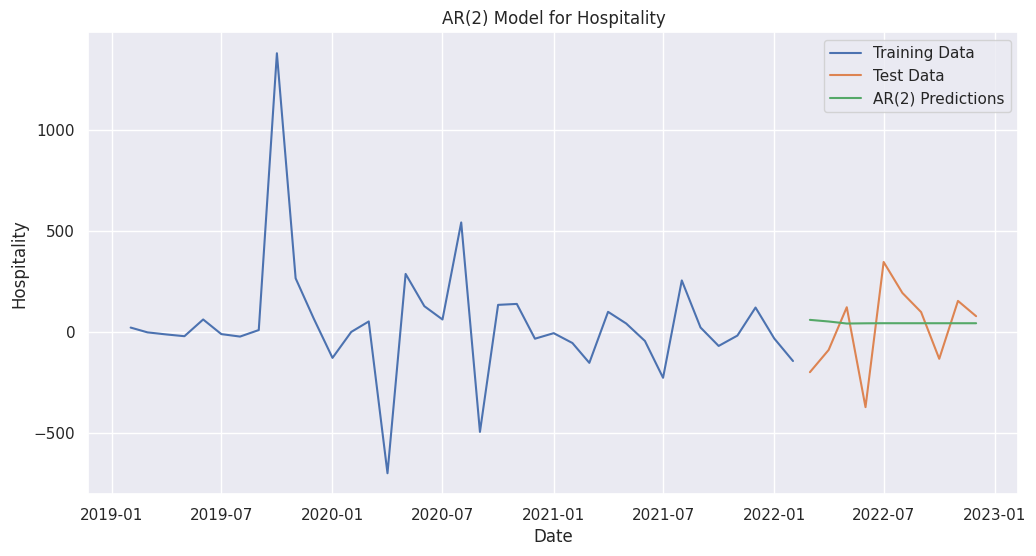

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


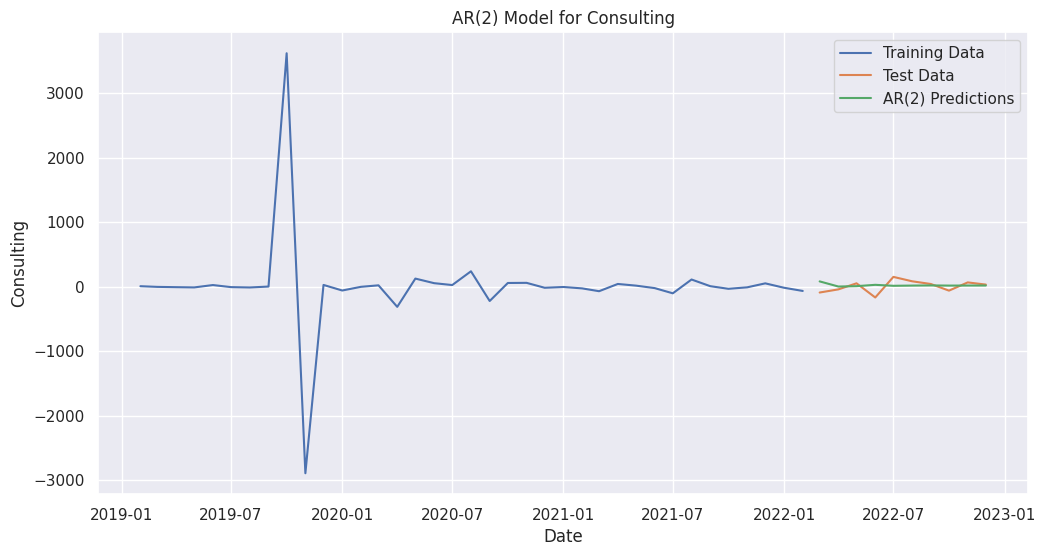

In [ ]:
# Loop through each column and fit AR models
for column in columns_to_model:
    # Fit AR(2) model
    model = AutoReg(df_train[column], lags=lags).fit()

    # Make predictions
    predictions = model.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1, dynamic=False)

    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.plot(df_train.index, df_train[column], label='Training Data')
    plt.plot(df_test.index, df_test[column], label='Test Data')
    plt.plot(df_test.index, predictions, label='AR(2) Predictions')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'AR(2) Model for {column}')
    plt.legend()
    plt.show()

    # Calculate evaluation metrics
    mse = mean_squared_error(df_test[column], predictions)
    mae = mean_absolute_error(df_test[column], predictions)
    r2 = r2_score(df_test[column], predictions)
    mape = calculate_mape(df_test[column], predictions)

    # Store results in the dictionary
    results[column] = {
        'Model Summary': model.summary(),
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'R-squared (R2)': r2,
        'Mean Absolute Percentage Error (MAPE)': mape
    }

In [ ]:
print(results)

{'Housing': {'Model Summary': <class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
Dep. Variable:                Housing   No. Observations:                   37
Model:                     AutoReg(2)   Log Likelihood                -323.180
Method:               Conditional MLE   S.D. of innovations           2476.908
Date:                Wed, 06 Sep 2023   AIC                            654.359
Time:                        15:15:15   BIC                            660.581
Sample:                    04-01-2019   HQIC                           656.507
                         - 02-01-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+04   3562.022      5.207      0.000    1.16e+04    2.55e+04
Housing.L1     0.3087      0.117      2.640      0.00

##  Wonjo

In [ ]:
bUnit =  'Wonjo'
dataWONJO = data[data["Business Unit"] == bUnit].drop(["Business Unit"], axis=1)
dataWONJO.head()

,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting
Date,,,,,,
2019-01-01,42967.86,334.70,635.17,621.583662,816.646951,362.95
2019-02-01,41029.63,362.71,798.98,673.602112,1027.257673,456.56
2019-03-01,22617.31,370.47,716.93,688.014774,921.761158,409.67
2019-04-01,42039.21,391.44,756.91,726.957751,973.171930,432.52
2019-05-01,44793.21,358.64,850.15,666.043183,1093.055480,485.80


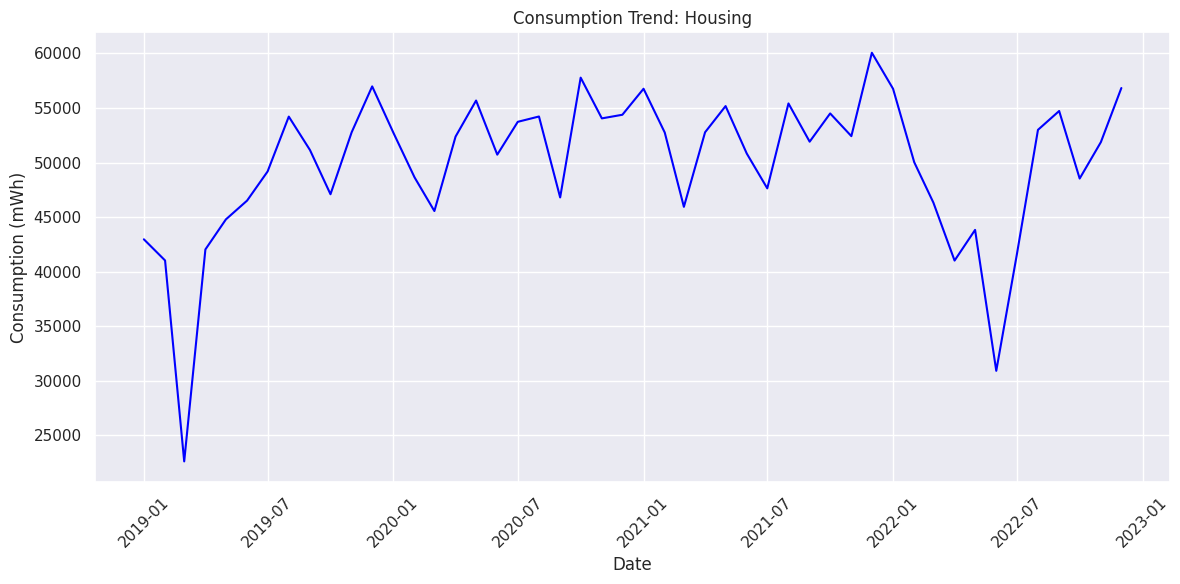

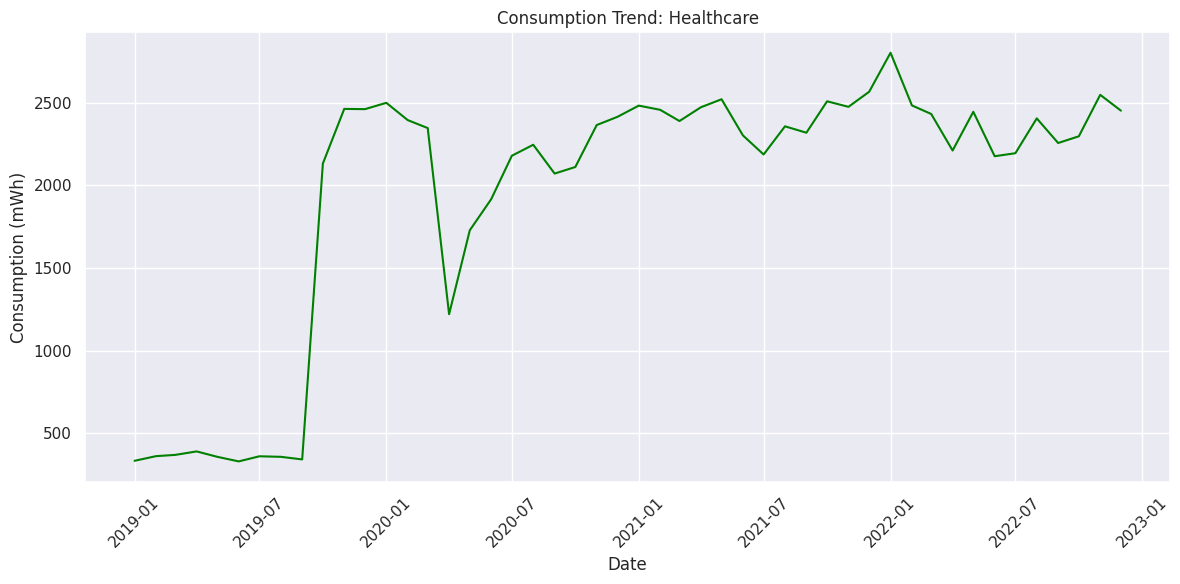

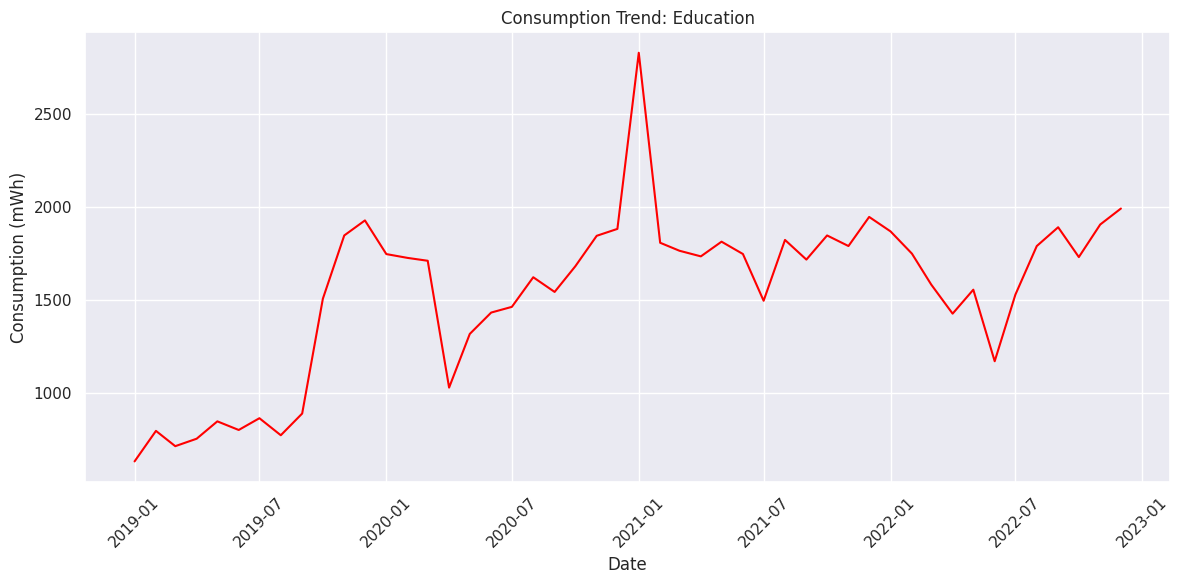

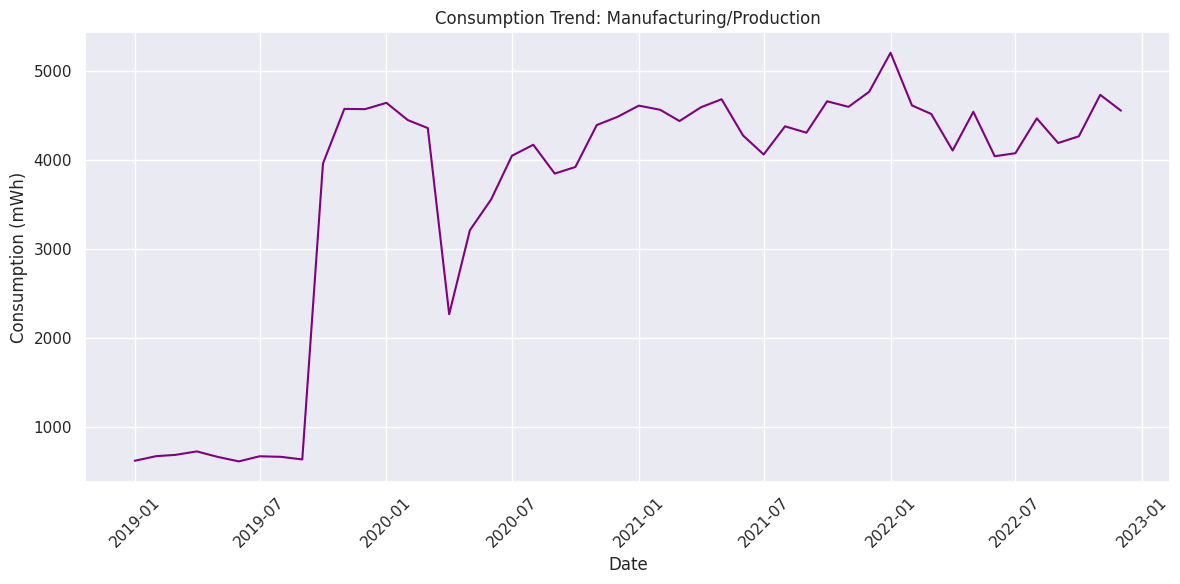

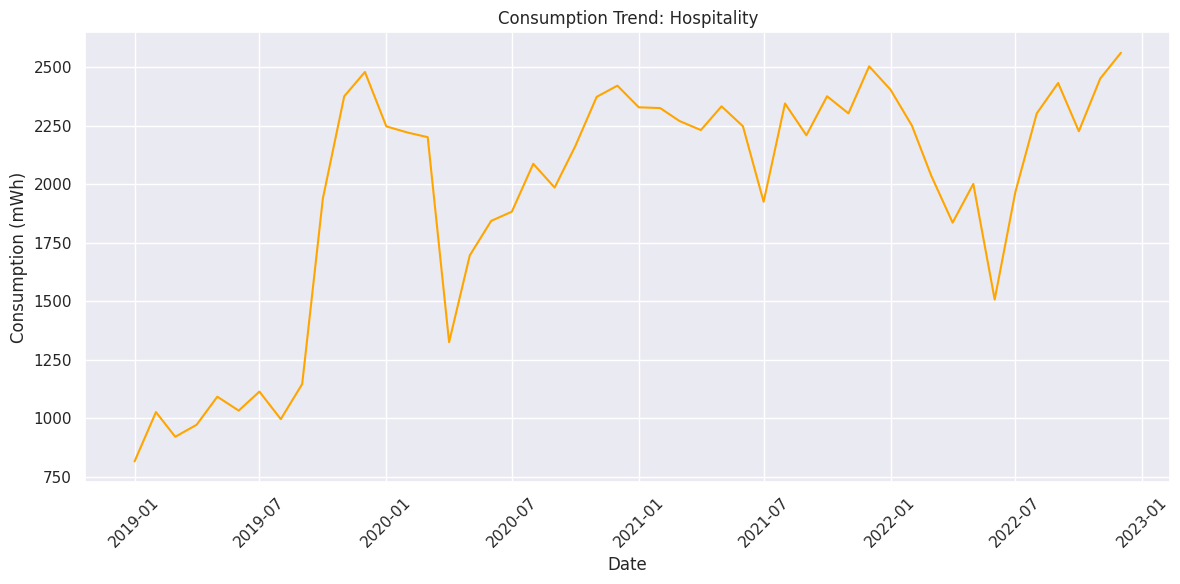

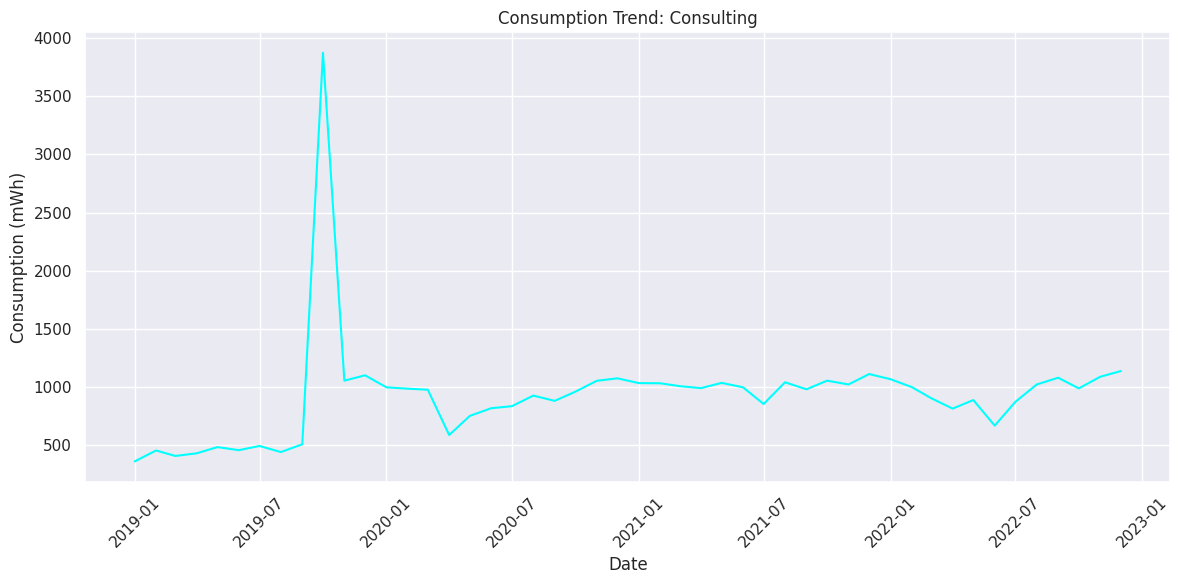

In [ ]:
# Columns to plot (excluding the index column)
columns_to_plot = dataWONJO.columns[0:]

# Set up colors for the lines
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Iterate through each column and create a separate line chart
for idx, col in enumerate(columns_to_plot):
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.plot(dataWONJO.index, dataWONJO[col], color=colors[idx])  # Use the index for x-axis
    plt.xlabel('Date')
    plt.ylabel('Consumption (mWh)')
    plt.title(f'Consumption Trend: {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()

    plt.show()

In [ ]:
dataWONJO["month"] = dataWONJO.index.month
dataWONJO["month_name"] =dataWONJO.index.month_name()
dataWONJO["year"] = dataWONJO.index.year
dataWONJO.head()

,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting,month,month_name,year
Date,,,,,,,,,
2019-01-01,42967.86,334.70,635.17,621.583662,816.646951,362.95,1,January,2019
2019-02-01,41029.63,362.71,798.98,673.602112,1027.257673,456.56,2,February,2019
2019-03-01,22617.31,370.47,716.93,688.014774,921.761158,409.67,3,March,2019
2019-04-01,42039.21,391.44,756.91,726.957751,973.171930,432.52,4,April,2019
2019-05-01,44793.21,358.64,850.15,666.043183,1093.055480,485.80,5,May,2019


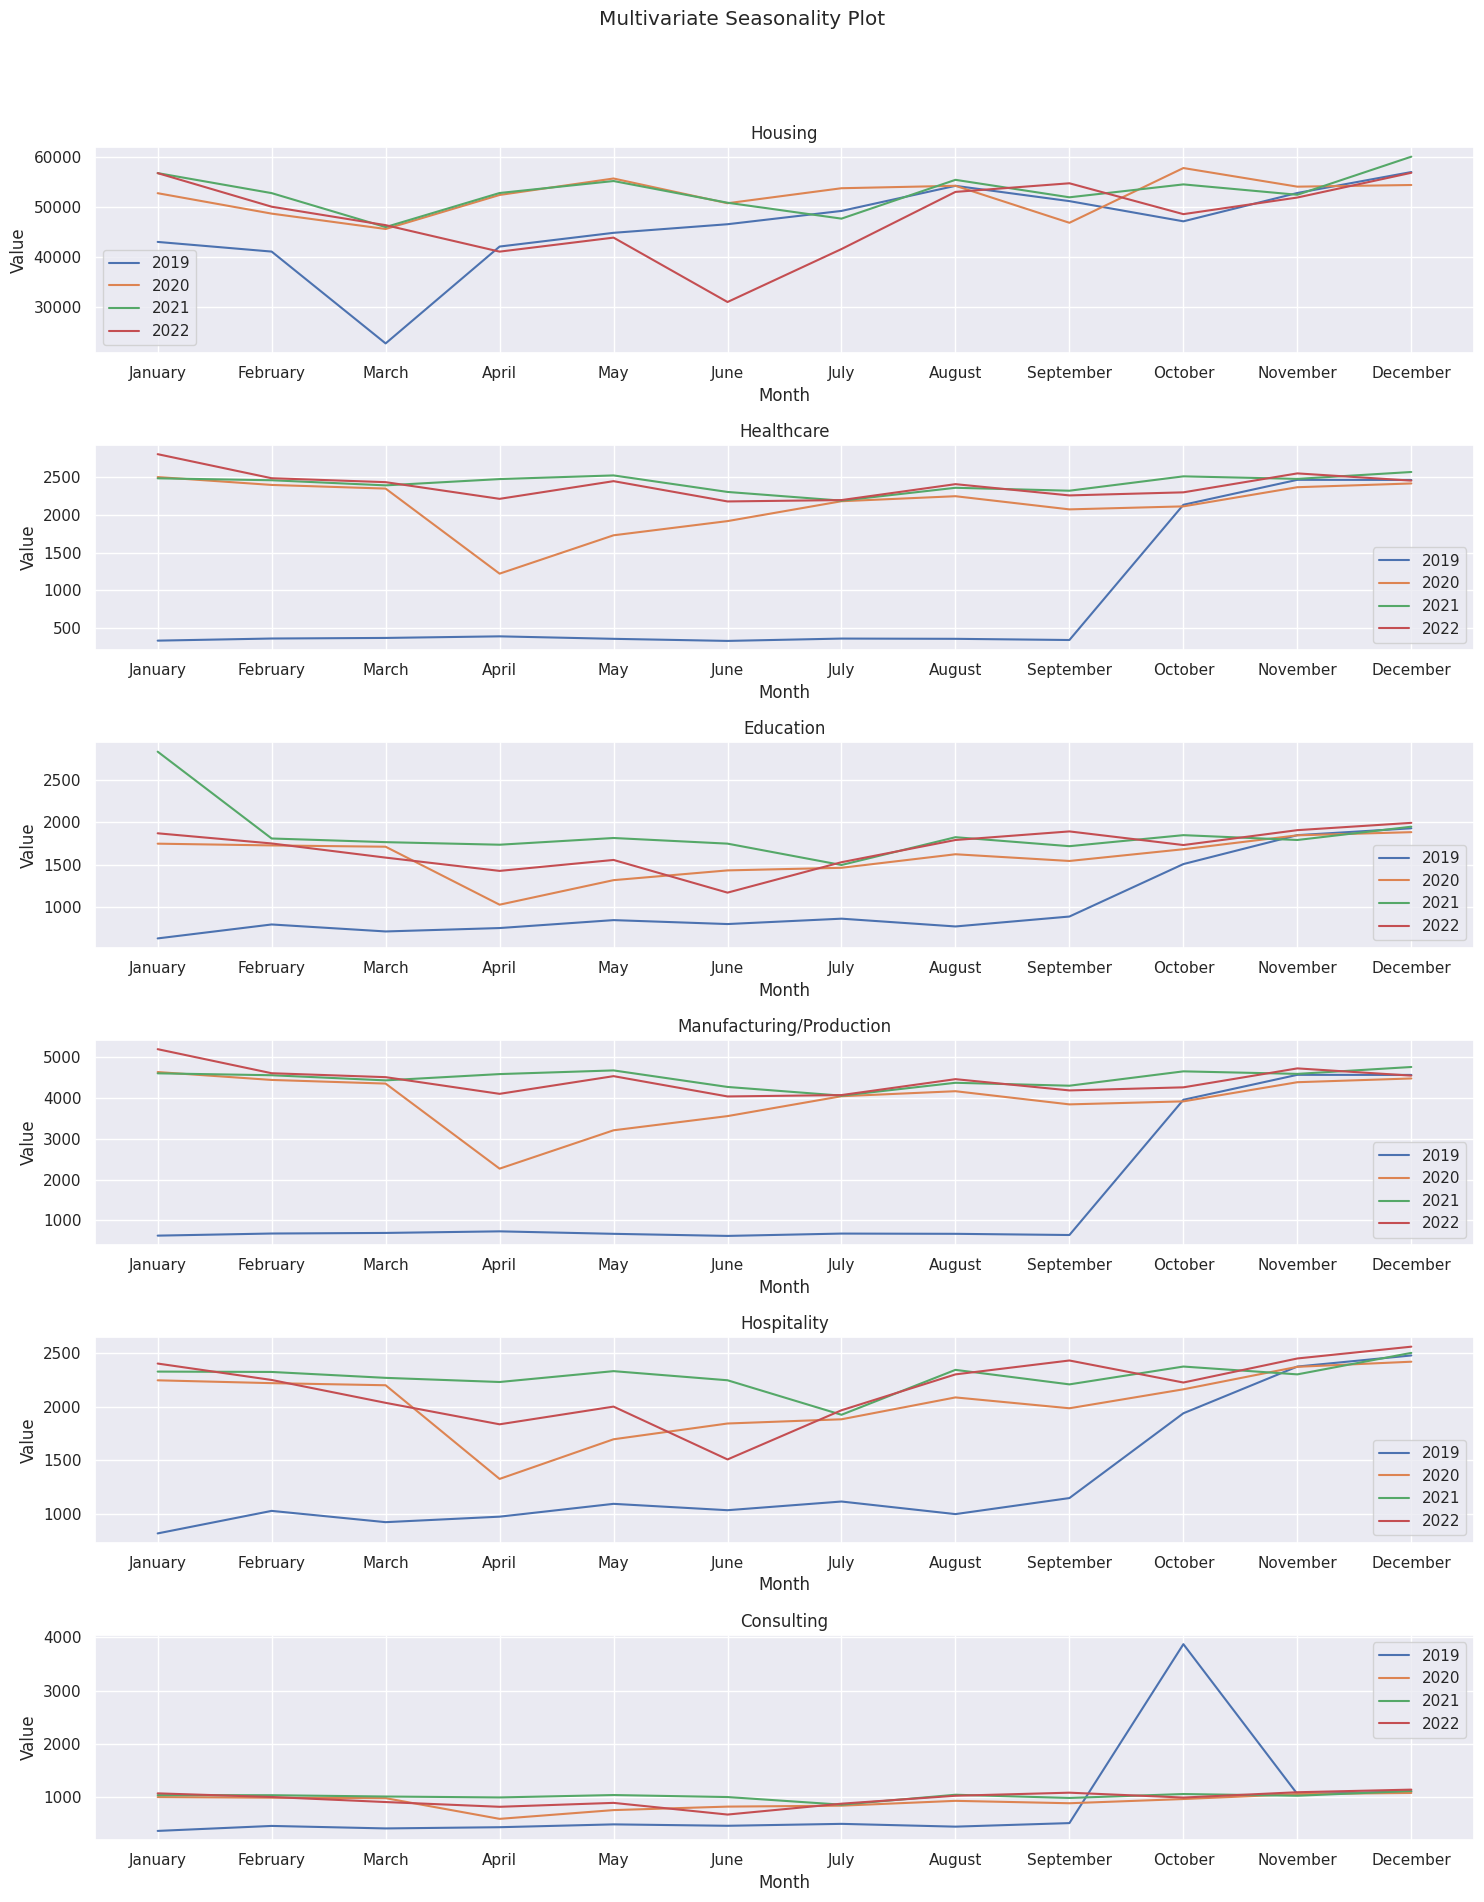

In [ ]:
# Set up subplots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))
fig.suptitle('Multivariate Seasonality Plot')

# Iterate through variables and plot them
variables = ['Housing', 'Healthcare', 'Education', 'Manufacturing/Production', 'Hospitality', 'Consulting']
for i, ax in enumerate(axes.flatten()):
    var = variables[i]
    for year in dataWONJO['year'].unique():
        subset = dataWONJO[dataWONJO['year'] == year]
        ax.plot(subset['month_name'], subset[var], label=str(year))

    ax.set_title(var)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


### Stationarity Test

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Columns in the dataframe
columns_to_check = [0, 1, 2, 3, 4, 5]  # Column indices

# Perform Augmented Dickey-Fuller test for each column
for col_index in columns_to_check:
    column_name = dataWONJO.columns[col_index]
    X = dataWONJO.iloc[:, col_index].values
    result = adfuller(X)
    print(f"Column: {column_name}")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

    if result[0] < result[4]["5%"]:
        print("Reject Ho - Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")

    print("="*50)

Column: Housing
ADF Statistic: -3.697191366015628
p-value: 0.004152833981076934
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Reject Ho - Time Series is Stationary
Column: Healthcare
ADF Statistic: -3.540665197853431
p-value: 0.007002119608110052
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject Ho - Time Series is Stationary
Column: Education
ADF Statistic: -2.753710009056729
p-value: 0.06519622049446314
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Failed to Reject Ho - Time Series is Non-Stationary
Column: Manufacturing/Production
ADF Statistic: -3.540673390900726
p-value: 0.007001932728477805
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject Ho - Time Series is Stationary
Column: Hospitality
ADF Statistic: -2.349312363381951
p-value: 0.15655636622737323
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Failed to Reject Ho - Time Series is Non-Stationary
Column: Consulting
ADF Statistic: -3.7568968633366855
p-value: 0.0033804179824525743
Cri

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
columns_to_difference = [ 5,3]

# Apply differencing to the specified columns
for col in columns_to_difference:
    dataWONJO.iloc[:, col] = dataWONJO.iloc[:, col].diff()

# Drop missing values in the resulting DataFrame
dataWONJO = dataWONJO.dropna()

# Check for stationarity using the Augmented Dickey-Fuller test
for col in columns_to_difference:
    result = adfuller(dataWONJO.iloc[:, col])
    print(f"ADF Statistic for column {col}: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    print(f"Is Stationary? {'Yes' if result[1] < 0.05 else 'No'}")


ADF Statistic for column 5: -3.39388685470466
P-value: 0.011169041997236175
Critical Values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}
Is Stationary? Yes
ADF Statistic for column 3: -4.12822920961424
P-value: 0.0008695402517168674
Critical Values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}
Is Stationary? Yes


In [ ]:
# Columns in the dataframe
columns_to_check = [0, 1, 2, 3, 4, 5]  # Column indices

# Perform Augmented Dickey-Fuller test for each column
for col_index in columns_to_check:
    column_name = dataWONJO.columns[col_index]
    X = dataWONJO.iloc[:, col_index].values
    result = adfuller(X)
    print(f"Column: {column_name}")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

    if result[0] < result[4]["5%"]:
        print("Reject Ho - Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")

    print("="*50)

Column: Housing
ADF Statistic: -3.785586871741733
p-value: 0.003058270875682605
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Reject Ho - Time Series is Stationary
Column: Healthcare
ADF Statistic: -4.624431158656404
p-value: 0.00011641879369677441
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607
Reject Ho - Time Series is Stationary
Column: Education
ADF Statistic: -2.7020078313260654
p-value: 0.07369147051292946
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Failed to Reject Ho - Time Series is Non-Stationary
Column: Manufacturing/Production
ADF Statistic: -4.12822920961424
p-value: 0.0008695402517168674
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Reject Ho - Time Series is Stationary
Column: Hospitality
ADF Statistic: -2.2209370821666523
p-value: 0.19873444448810718
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Failed to Reject Ho - Time Series is Non-Stationary
Column: Consulting
ADF Statistic: -3.39388685470466
p-value: 0.011169041997236175
Cr

In [ ]:
columns_to_difference = [ 2,4]

# Apply differencing to the specified columns
for col in columns_to_difference:
    dataWONJO.iloc[:, col] = dataWONJO.iloc[:, col].diff()

# Drop missing values in the resulting DataFrame
dataWONJO = dataWONJO.dropna()

# Check for stationarity using the Augmented Dickey-Fuller test
for col in columns_to_difference:
    result = adfuller(dataWONJO.iloc[:, col])
    print(f"ADF Statistic for column {col}: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    print(f"Is Stationary? {'Yes' if result[1] < 0.05 else 'No'}")

ADF Statistic for column 2: -8.53366438863669
P-value: 1.0216103119015139e-13
Critical Values: {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}
Is Stationary? Yes
ADF Statistic for column 4: -4.008837670457323
P-value: 0.0013649350908473802
Critical Values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}
Is Stationary? Yes


In [ ]:
# Columns in the dataframe
columns_to_check = [0, 1, 2, 3, 4, 5]  # Column indices

# Perform Augmented Dickey-Fuller test for each column
for col_index in columns_to_check:
    column_name = dataWONJO.columns[col_index]
    X = dataWONJO.iloc[:, col_index].values
    result = adfuller(X)
    print(f"Column: {column_name}")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

    if result[0] < result[4]["5%"]:
        print("Reject Ho - Time Series is Stationary")
    else:
        print("Failed to Reject Ho - Time Series is Non-Stationary")

    print("="*50)

Column: Housing
ADF Statistic: -5.555910888049759
p-value: 1.5811567603653127e-06
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Reject Ho - Time Series is Stationary
Column: Healthcare
ADF Statistic: -8.533159339717523
p-value: 1.0246551976851099e-13
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608
Reject Ho - Time Series is Stationary
Column: Education
ADF Statistic: -8.53366438863669
p-value: 1.0216103119015139e-13
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Reject Ho - Time Series is Stationary
Column: Manufacturing/Production
ADF Statistic: -4.075758802279558
p-value: 0.0010618449536860955
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607
Reject Ho - Time Series is Stationary
Column: Hospitality
ADF Statistic: -4.008837670457323
p-value: 0.0013649350908473802
Critical Values:
	1%: -3.606
	5%: -2.937
	10%: -2.607
Reject Ho - Time Series is Stationary
Column: Consulting
ADF Statistic: -3.340416004559664
p-value: 0.013165746238694358
Critical Values:
	1%: -3

### ACF and PACF


In [ ]:
# Columns in the dataframe
columns_to_check = dataWONJO.columns[:6] # Column indices

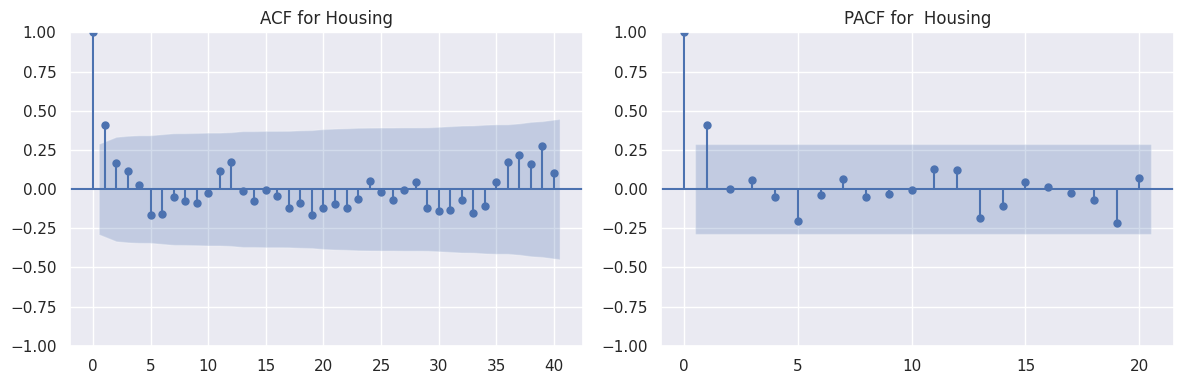

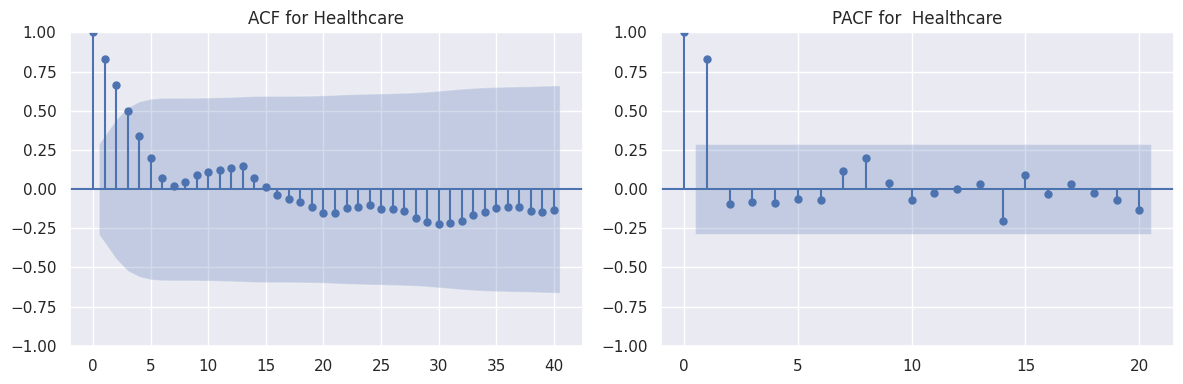

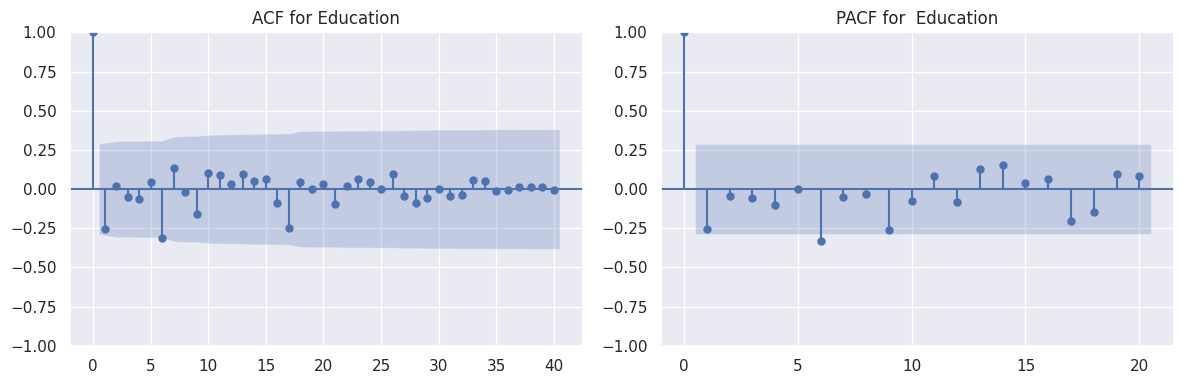

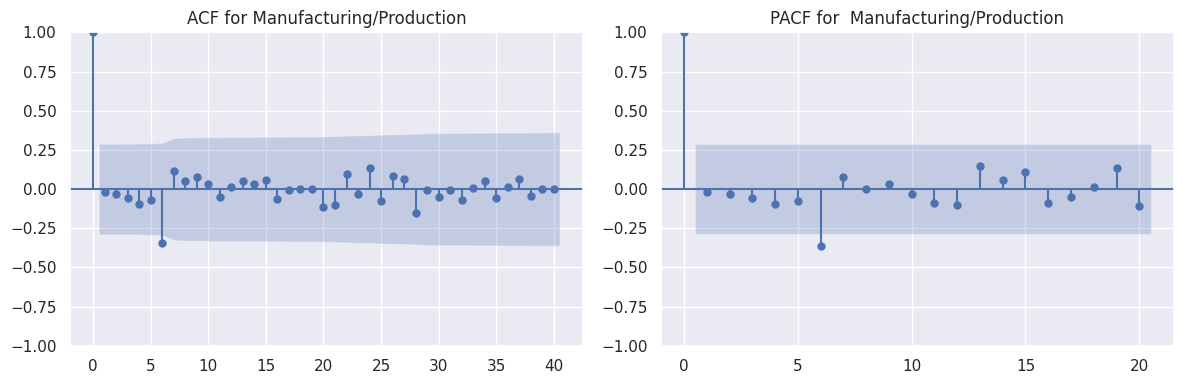

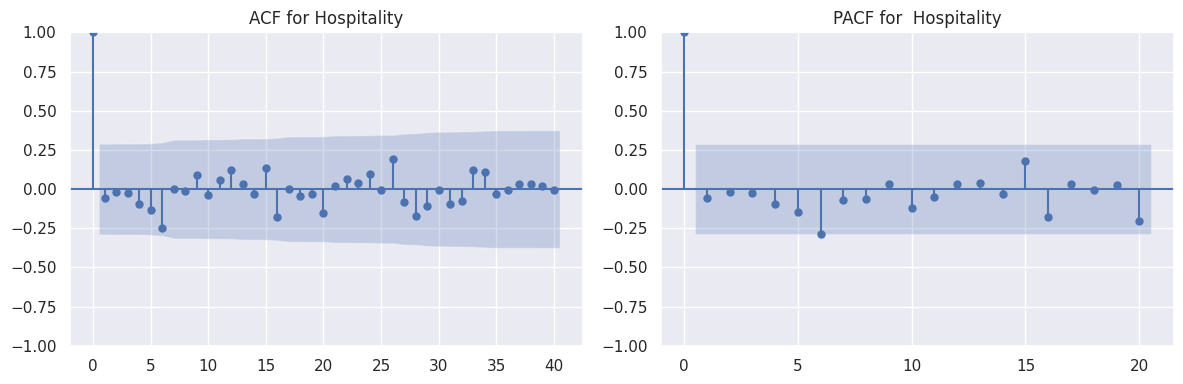

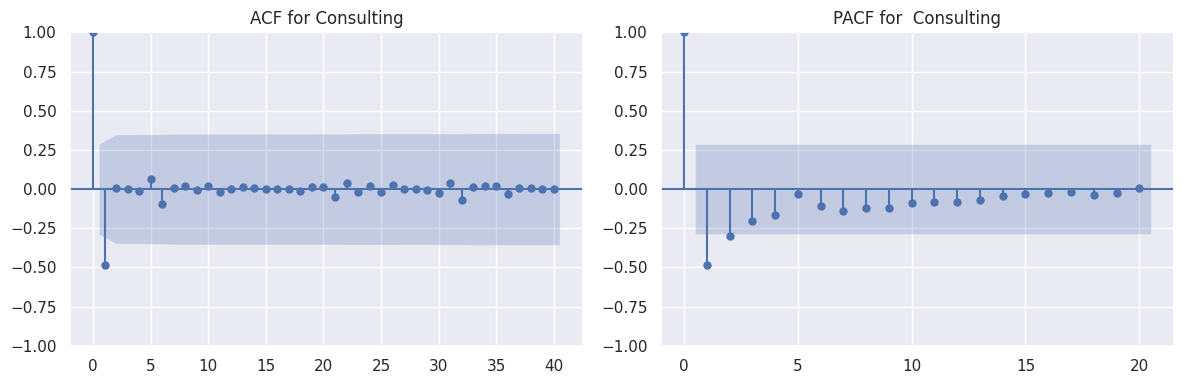

In [ ]:
# Visualize ACF and PACF for each column
for col in columns_to_check:
    plt.figure(figsize=(12, 4))

    # ACF Plot
    ax1 = plt.subplot(121)
    plot_acf(dataWONJO[col], ax=ax1, lags=40)
    ax1.set_title(f'ACF for {col}')

    # PACF Plot
    ax2 = plt.subplot(122)
    plot_pacf(dataWONJO[col], ax=ax2, lags=20)
    ax2.set_title(f'PACF for  {col}')

    plt.tight_layout()
    plt.show()

### Orde of the model



**Forecasting using AR Model**

In [ ]:
#make copy of the data
dfWONJO=dataWONJO.copy()
dfWONJO.head()


,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting,month,month_name,year
Date,,,,,,,,,
2019-03-01,22617.31,370.47,-82.05,14.412662,-105.496515,-46.89,3,March,2019
2019-04-01,42039.21,391.44,39.98,38.942977,51.410772,22.85,4,April,2019
2019-05-01,44793.21,358.64,93.24,-60.914568,119.883550,53.28,5,May,2019
2019-06-01,46514.86,331.04,-46.27,-51.252331,-59.495682,-26.44,6,June,2019
2019-07-01,49183.55,361.96,63.14,57.413148,81.180202,36.08,7,July,2019


In [ ]:
dfWONJO.drop(['month'	,'month_name'	,'year'], axis=1,inplace=True)
dfWONJO.head()

,Housing,Healthcare,Education,Manufacturing/Production,Hospitality,Consulting
Date,,,,,,
2019-03-01,22617.31,370.47,-82.05,14.412662,-105.496515,-46.89
2019-04-01,42039.21,391.44,39.98,38.942977,51.410772,22.85
2019-05-01,44793.21,358.64,93.24,-60.914568,119.883550,53.28
2019-06-01,46514.86,331.04,-46.27,-51.252331,-59.495682,-26.44
2019-07-01,49183.55,361.96,63.14,57.413148,81.180202,36.08


In [ ]:
size=int(len(dfWONJO)*0.8)
df_train=dfWONJO.iloc[:size]
df_test=dfWONJO.iloc[size:]

In [ ]:
# Specify the lag order for AR model
lags = 2  # AR(2) model

# Define a list of columns to model
columns_to_model = df_train.columns

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


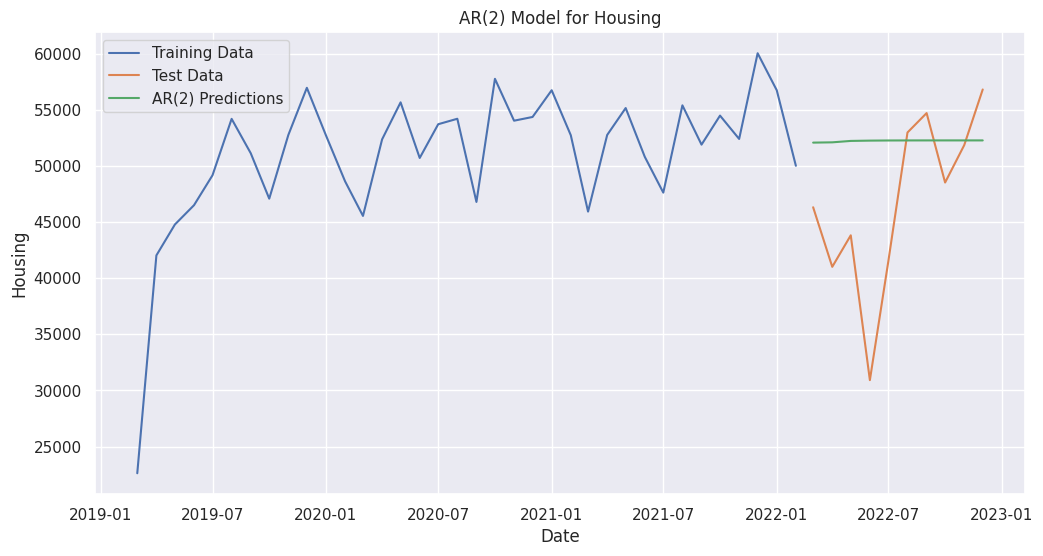

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


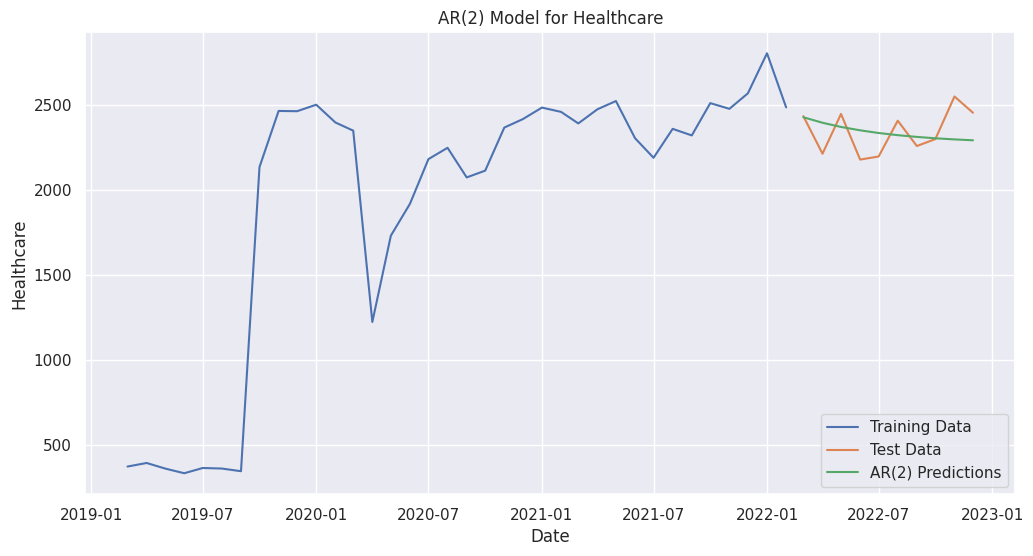

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


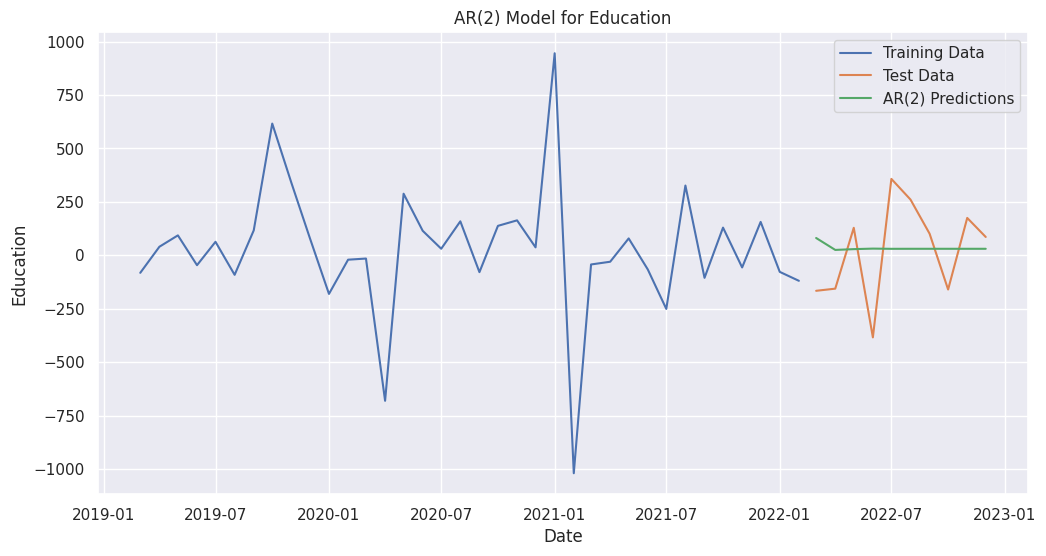

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


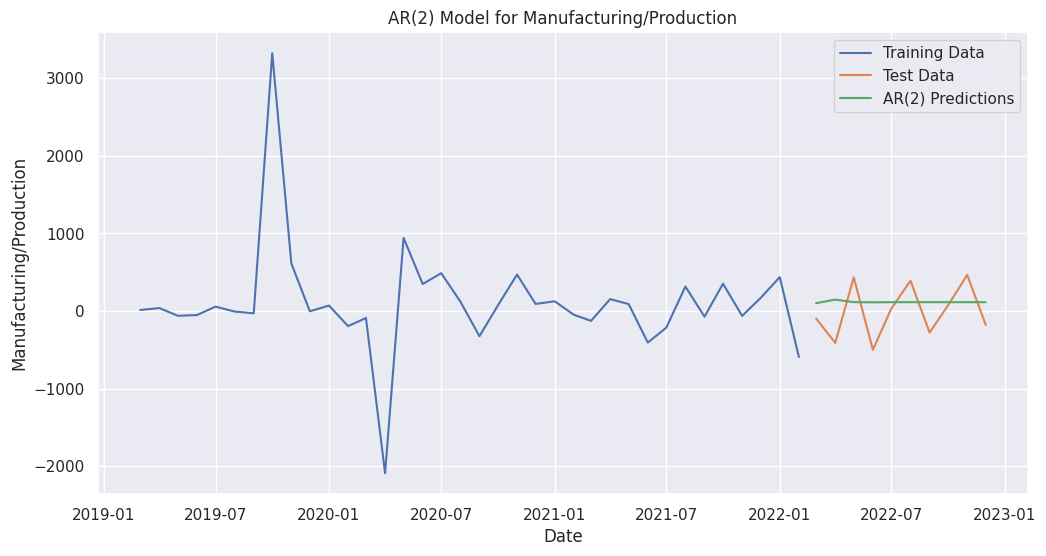

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


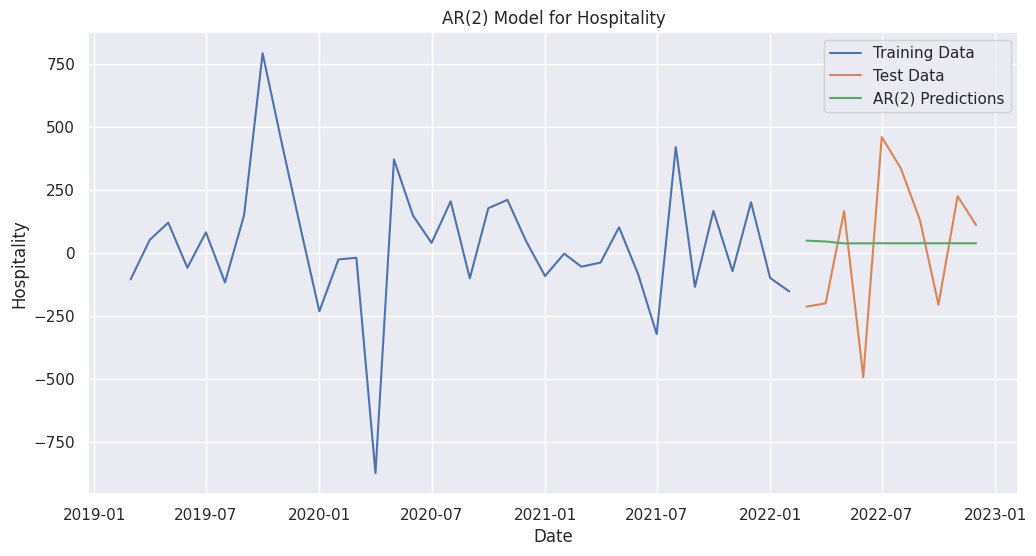

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


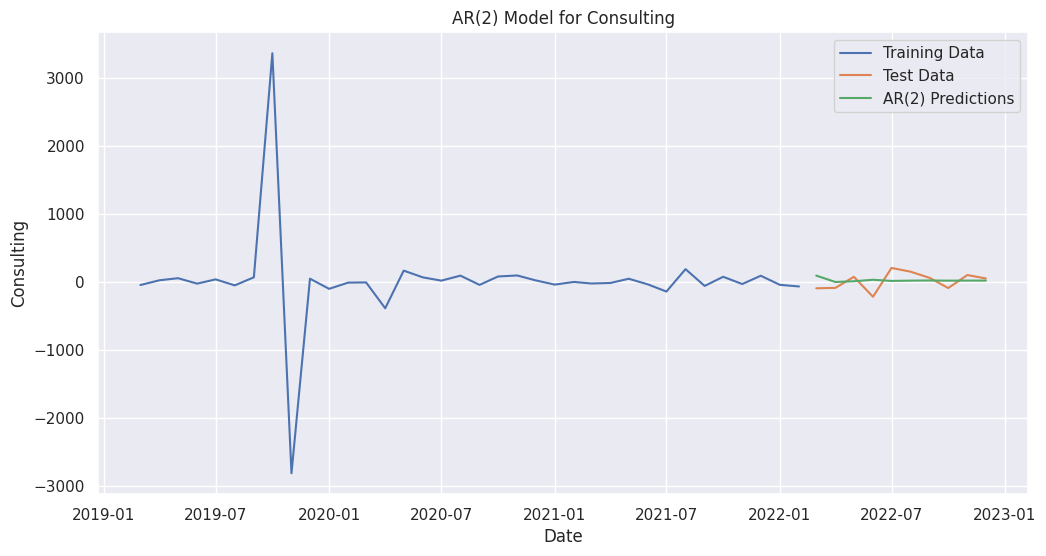

In [ ]:
# Loop through each column and fit AR models
for column in columns_to_model:
    # Fit AR(2) model
    model = AutoReg(df_train[column], lags=lags).fit()

    # Make predictions
    predictions = model.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1, dynamic=False)

    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.plot(df_train.index, df_train[column], label='Training Data')
    plt.plot(df_test.index, df_test[column], label='Test Data')
    plt.plot(df_test.index, predictions, label='AR(2) Predictions')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'AR(2) Model for {column}')
    plt.legend()
    plt.show()

    # Calculate evaluation metrics
    mse = mean_squared_error(df_test[column], predictions)
    mae = mean_absolute_error(df_test[column], predictions)
    r2 = r2_score(df_test[column], predictions)
    mape = calculate_mape(df_test[column], predictions)

    # Store results in the dictionary
    results[column] = {
        'Model Summary': model.summary(),
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'R-squared (R2)': r2,
        'Mean Absolute Percentage Error (MAPE)': mape
    }

In [ ]:
print(results)

{'Housing': {'Model Summary': <class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
Dep. Variable:                Housing   No. Observations:                   36
Model:                     AutoReg(2)   Log Likelihood                -327.122
Method:               Conditional MLE   S.D. of innovations           3649.318
Date:                Wed, 06 Sep 2023   AIC                            662.244
Time:                        15:15:43   BIC                            668.349
Sample:                    05-01-2019   HQIC                           664.326
                         - 02-01-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.865e+04   7949.575      4.862      0.000    2.31e+04    5.42e+04
Housing.L1     0.2025      0.173      1.172      0.24